In [1]:
#importamos las librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Limpieza de datos

In [5]:
#cargo el dataset
df = pd.read_csv('/Users/chrisalanapazaaguilar/Documents/Others/ASL Recognition With Flutter/ai/tensorflow/mediapipe_solution/american_train.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={0: 'label'})

#eliminamos todas las que tengan output un numero
#df = df[df['Output'].str.isalpha()]
df

/var/folders/w9/47hfrj5s20n22dxytnnn2mjh0000gn/T/ipykernel_2453/447525788.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/chrisalanapazaaguilar/Documents/Others/ASL Recognition With Flutter/ai/tensorflow/mediapipe_solution/american_train.csv')


,label,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A,0.358380,0.639114,0.476315,0.591021,0.575420,0.472831,0.611015,0.357431,0.560680,...,0.385117,0.425318,0.288392,0.386897,0.283148,0.327714,0.302711,0.405931,0.313507,0.438124
1,A,0.440783,0.611492,0.601374,0.547232,0.732501,0.387669,0.751637,0.214263,0.730423,...,0.456217,0.349991,0.322050,0.252646,0.325502,0.150584,0.356125,0.263612,0.368936,0.333012
2,A,0.400375,0.698562,0.525210,0.647470,0.643937,0.529910,0.682412,0.398727,0.638684,...,0.421985,0.456704,0.322661,0.410097,0.314311,0.358401,0.332379,0.446346,0.345709,0.467737
3,A,0.518798,0.716324,0.636429,0.648193,0.725917,0.526102,0.756226,0.415488,0.738668,...,0.528749,0.472358,0.419258,0.447894,0.437079,0.395084,0.465932,0.467382,0.461886,0.486799
4,A,0.501057,0.756671,0.674054,0.675447,0.831542,0.528101,0.878792,0.371835,0.785635,...,0.510249,0.481234,0.355006,0.402328,0.374972,0.314373,0.416858,0.426196,0.425080,0.486344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165664,Z,0.868438,0.559578,0.865218,0.477887,0.795433,0.368314,0.693559,0.366241,0.618673,...,0.692780,0.491876,0.595183,0.540586,0.530990,0.509481,0.604325,0.522586,0.655986,0.543877
165665,Z,0.713874,0.553968,0.719450,0.469388,0.658088,0.348863,0.555399,0.332930,0.475767,...,0.553609,0.459110,0.447291,0.500302,0.395973,0.453251,0.468072,0.468280,0.512614,0.497435
165666,Z,0.683352,0.792810,0.690322,0.669046,0.611069,0.524704,0.486934,0.528794,0.422658,...,0.508622,0.701366,0.390352,0.793497,0.343562,0.755040,0.432171,0.756803,0.471549,0.769293
165667,Z,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# tamaño del dataset sin limpiar 
df.shape

(165669, 43)

In [8]:
# removemos los datos nulos del dataset
all_null_values = df[df.iloc[:, 0] == 0]
print("Cantidad de valores nulos: ", len(all_null_values.index))

Cantidad de valores nulos:  0


In [11]:
# eliminamos los datos nulos
df = df.drop(all_null_values.index)
df.shape

# elimnamos los datos nan
df = df.dropna()
df.shape
df

,label,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A,0.358380,0.639114,0.476315,0.591021,0.575420,0.472831,0.611015,0.357431,0.560680,...,0.385117,0.425318,0.288392,0.386897,0.283148,0.327714,0.302711,0.405931,0.313507,0.438124
1,A,0.440783,0.611492,0.601374,0.547232,0.732501,0.387669,0.751637,0.214263,0.730423,...,0.456217,0.349991,0.322050,0.252646,0.325502,0.150584,0.356125,0.263612,0.368936,0.333012
2,A,0.400375,0.698562,0.525210,0.647470,0.643937,0.529910,0.682412,0.398727,0.638684,...,0.421985,0.456704,0.322661,0.410097,0.314311,0.358401,0.332379,0.446346,0.345709,0.467737
3,A,0.518798,0.716324,0.636429,0.648193,0.725917,0.526102,0.756226,0.415488,0.738668,...,0.528749,0.472358,0.419258,0.447894,0.437079,0.395084,0.465932,0.467382,0.461886,0.486799
4,A,0.501057,0.756671,0.674054,0.675447,0.831542,0.528101,0.878792,0.371835,0.785635,...,0.510249,0.481234,0.355006,0.402328,0.374972,0.314373,0.416858,0.426196,0.425080,0.486344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165663,Z,0.658476,0.660220,0.689398,0.572275,0.652143,0.456020,0.559285,0.430547,0.478762,...,0.506823,0.520389,0.407652,0.581109,0.368507,0.534999,0.433365,0.549464,0.477862,0.575246
165664,Z,0.868438,0.559578,0.865218,0.477887,0.795433,0.368314,0.693559,0.366241,0.618673,...,0.692780,0.491876,0.595183,0.540586,0.530990,0.509481,0.604325,0.522586,0.655986,0.543877
165665,Z,0.713874,0.553968,0.719450,0.469388,0.658088,0.348863,0.555399,0.332930,0.475767,...,0.553609,0.459110,0.447291,0.500302,0.395973,0.453251,0.468072,0.468280,0.512614,0.497435
165666,Z,0.683352,0.792810,0.690322,0.669046,0.611069,0.524704,0.486934,0.528794,0.422658,...,0.508622,0.701366,0.390352,0.793497,0.343562,0.755040,0.432171,0.756803,0.471549,0.769293


## Normalización de los datos

In [12]:
X = df.iloc[:, 1:]
print("Tamaño de las características: ", X.shape)
Y = df.iloc[:, 0]
print("Tamaño de las etiquetas: ", Y.shape)

Tamaño de las características:  (146394, 42)
Tamaño de las etiquetas:  (146394,)


## Separación de los datos

In [13]:
# dividimos el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Elaboración del modelo

In [14]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [15]:
# precision del entrenamiento
print ("Precision del entrenamiento: ", svm.score(x_train, y_train))

Precision del entrenamiento:  0.9999914613841097


In [16]:
y_pred = svm.predict(x_test)

In [17]:
# precision del test
print( "Precisión del test: ", accuracy_score(y_test, y_pred))

Precisión del test:  0.9999316916561358


## Visualizamos la matriz de confusión

In [18]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [19]:
f1, recall, precision

(0.9999316916561358, 0.9999316916561358, 0.9999316916561358)

<AxesSubplot: title={'center': 'Matriz de confusión American Sign Language'}>

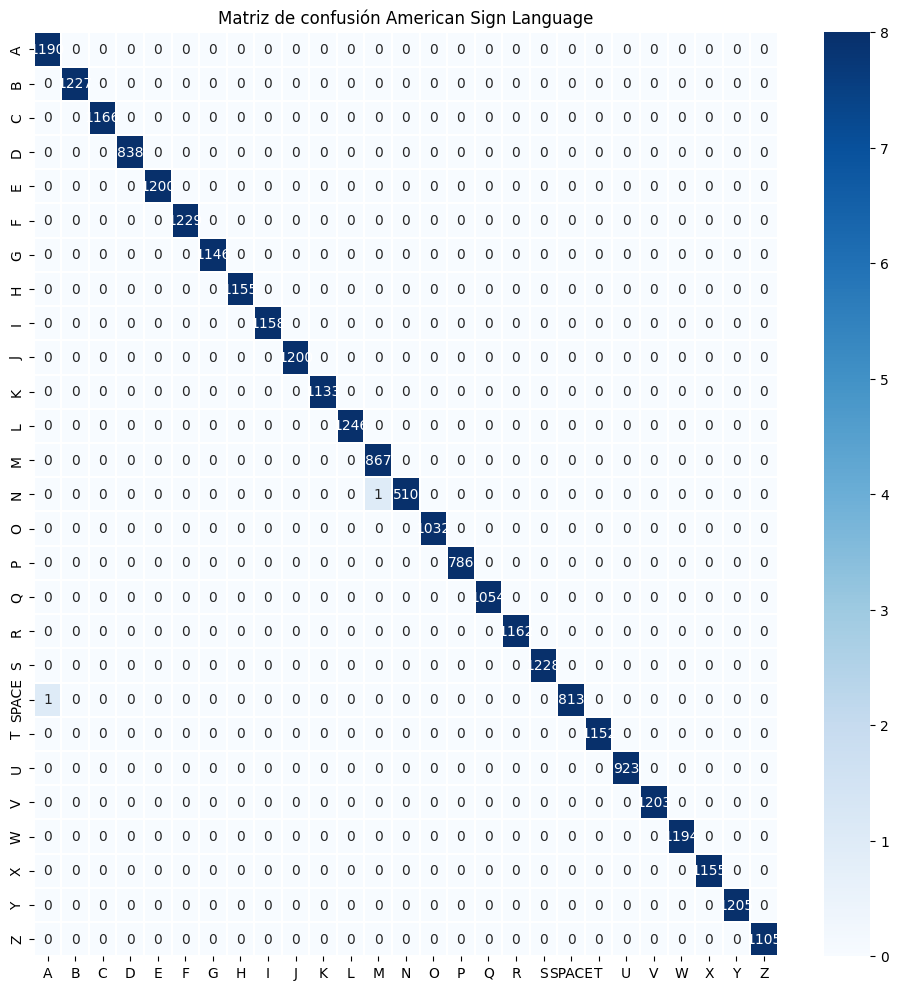

In [21]:
labels = sorted(list(set(df['label'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title('Matriz de confusión American Sign Language')

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [22]:
# Guardamos la matriz de confusión
maping.figure.savefig("output.png")

In [23]:
# Guardamos el modelo
joblib.dump(svm, 'model.pkl')

['model.pkl']